# **Kendall Lab Survival Curve**

## **11-1-24**

### **Brian J. Ault**

In [1]:
!pip install lifelines

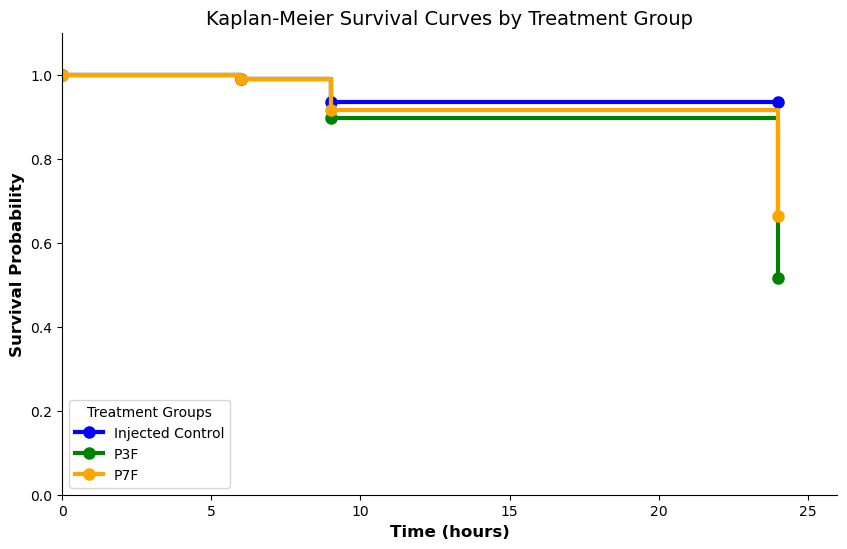

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Original data structure
survival_data = {
    'time': [
        6, 9, 24,  # Injected Control
        6, 9, 24,  # P3F
        6, 9, 24   # P7F
    ],
    'event_observed': [
        1, 4, 0,  # Injected Control
        1, 6, 11,  # P3F
        1, 5, 8   # P7F
    ],
    'n_at_risk': [
        39, 35, 35,  # Injected Control
        43, 37, 26,  # P3F
        42, 37, 29   # P7F
    ],
    'group': [
        'Injected Control', 'Injected Control', 'Injected Control',  # Injected Control
        'P3F', 'P3F', 'P3F',  # P3F
        'P7F', 'P7F', 'P7F'   # P7F
    ]
}

# Convert data to individual-level entries
expanded_data = []
for i, row in pd.DataFrame(survival_data).iterrows():
    group = row['group']
    time = row['time']
    event_observed = row['event_observed']
    n_at_risk = row['n_at_risk']
    
    # Append censored individuals who survived up to `time`
    expanded_data.extend([{'time': time, 'event_observed': 0, 'group': group}] * (n_at_risk - event_observed))
    
    # Append individuals who experienced the event at `time`
    expanded_data.extend([{'time': time, 'event_observed': 1, 'group': group}] * event_observed)

# Create a DataFrame with the expanded data
df_expanded = pd.DataFrame(expanded_data)

# Plotting Kaplan-Meier survival curves
plt.figure(figsize=(10, 6))
kmf = KaplanMeierFitter()
colors = {
    'Injected Control': 'blue',
    'P3F': 'green',
    'P7F': 'orange'
}

# Fit and plot for each group
for group in df_expanded['group'].unique():
    group_data = df_expanded[df_expanded['group'] == group]
    
    # Fit the Kaplan-Meier model
    kmf.fit(durations=group_data['time'], event_observed=group_data['event_observed'], label=group)
    
    # Plot the survival function
    kmf.plot_survival_function(linewidth=3, ci_show=False, marker='o', markersize=8, color=colors[group])

# Customize plot
plt.xlabel('Time (hours)', fontsize=12, fontweight='bold')
plt.ylabel('Survival Probability', fontsize=12, fontweight='bold')
plt.xlim(0, 26)
plt.ylim(0, 1.1)

plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(title='Treatment Groups')
plt.title('Kaplan-Meier Survival Curves by Treatment Group', fontsize=14)
plt.show()